**Big Data Analysis Coursework 2**

**Harth Motion Sensor Data**

**Author: Sandor Kanda**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import pandas as pd
import importlib.util
import datetime
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [31]:
# Requirements.txt
if os.path.exists('requirements.txt'):
    print("'requirements.txt' already exists.")
else:
    # Capture the pip freeze output
    output = !pip freeze

    # Write the output to requirements.txt
    with open('requirements.txt', 'w') as f:
        f.write('\n'.join(output))
    print("requirements.txt file is generated.")

requirements.txt file is generated.


In [2]:
dataPath = '/mnt/data2/sandorkanda_idoru/BDA/harth/data/*.csv'
csv_files = [f for f in glob.glob(dataPath) if os.path.isfile(f)]
print(csv_files)  # Check what files are being found

if csv_files:  # Proceed only if there are files to concatenate
  df= pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)
print(df.head())  # Print first few rows of the combined dataframe

['/mnt/data2/sandorkanda_idoru/BDA/harth/S012.csv', '/mnt/data2/sandorkanda_idoru/BDA/harth/S014.csv', '/mnt/data2/sandorkanda_idoru/BDA/harth/S018.csv', '/mnt/data2/sandorkanda_idoru/BDA/harth/S017.csv', '/mnt/data2/sandorkanda_idoru/BDA/harth/S016.csv', '/mnt/data2/sandorkanda_idoru/BDA/harth/S015.csv', '/mnt/data2/sandorkanda_idoru/BDA/harth/S013.csv']
                 timestamp    back_x    back_y    back_z   thigh_x   thigh_y  \
0  2000-01-01 00:00:00.000 -3.810360  0.165219 -0.663742 -0.919657 -0.759899   
1  2000-01-01 00:00:00.020 -0.188988 -0.235452 -1.343093 -0.137463 -0.852652   
2  2000-01-01 00:00:00.040 -0.060000  0.008919 -0.876293  1.347957 -0.642281   
3  2000-01-01 00:00:00.060 -1.222393  0.028038 -0.460220  1.063477 -2.840740   
4  2000-01-01 00:00:00.080 -1.026113 -0.170239 -0.163068 -3.239610  0.924564   

    thigh_z  label  index  
0  0.239633      6    NaN  
1 -1.423640      6    NaN  
2 -2.081678      6    NaN  
3 -0.143171      6    NaN  
4 -0.720399      6   

### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580668 entries, 0 to 2580667
Data columns (total 9 columns):
 #   Column     Dtype  
---  ------     -----  
 0   timestamp  object 
 1   back_x     float64
 2   back_y     float64
 3   back_z     float64
 4   thigh_x    float64
 5   thigh_y    float64
 6   thigh_z    float64
 7   label      int64  
 8   index      float64
dtypes: float64(7), int64(1), object(1)
memory usage: 177.2+ MB


In [4]:
df.head()

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label,index
0,2000-01-01 00:00:00.000,-3.810360,0.165219,-0.663742,-0.919657,-0.759899,0.239633,6,NaN
1,2000-01-01 00:00:00.020,-0.188988,-0.235452,-1.343093,-0.137463,-0.852652,-1.423640,6,NaN
2,2000-01-01 00:00:00.040,-0.060000,0.008919,-0.876293,1.347957,-0.642281,-2.081678,6,NaN
3,2000-01-01 00:00:00.060,-1.222393,0.028038,-0.460220,1.063477,-2.840740,-0.143171,6,NaN
4,2000-01-01 00:00:00.080,-1.026113,-0.170239,-0.163068,-3.239610,0.924564,-0.720399,6,NaN


In [5]:
df.drop(columns=['timestamp', 'index'], inplace=True)

In [6]:
df.describe()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
count,2.580668e+06,2.580668e+06,2.580668e+06,2.580668e+06,2.580668e+06,2.580668e+06,2.580668e+06
mean,-8.741502e-01,1.829154e-03,-1.328038e-01,-4.712772e-01,5.489203e-02,5.656109e-01,6.214782e+00
std,3.199065e-01,2.419559e-01,3.225808e-01,4.765173e-01,3.292622e-01,5.753035e-01,3.927469e+00
min,-5.406958e+00,-2.071573e+00,-3.055944e+00,-7.483251e+00,-6.385980e+00,-7.208220e+00,1.000000e+00
25%,-9.998179e-01,-6.471571e-02,-3.045925e-01,-9.176257e-01,-7.060859e-02,6.640893e-02,6.000000e+00
50%,-9.841057e-01,1.575966e-02,-7.199848e-02,-3.429117e-01,3.958397e-02,9.048722e-01,7.000000e+00
75%,-8.915544e-01,8.074149e-02,5.998398e-02,-1.495664e-01,1.557272e-01,9.663542e-01,7.000000e+00
max,2.291708e+00,3.482324e+00,2.723054e+00,5.372528e+00,7.182237e+00,7.914523e+00,1.400000e+02


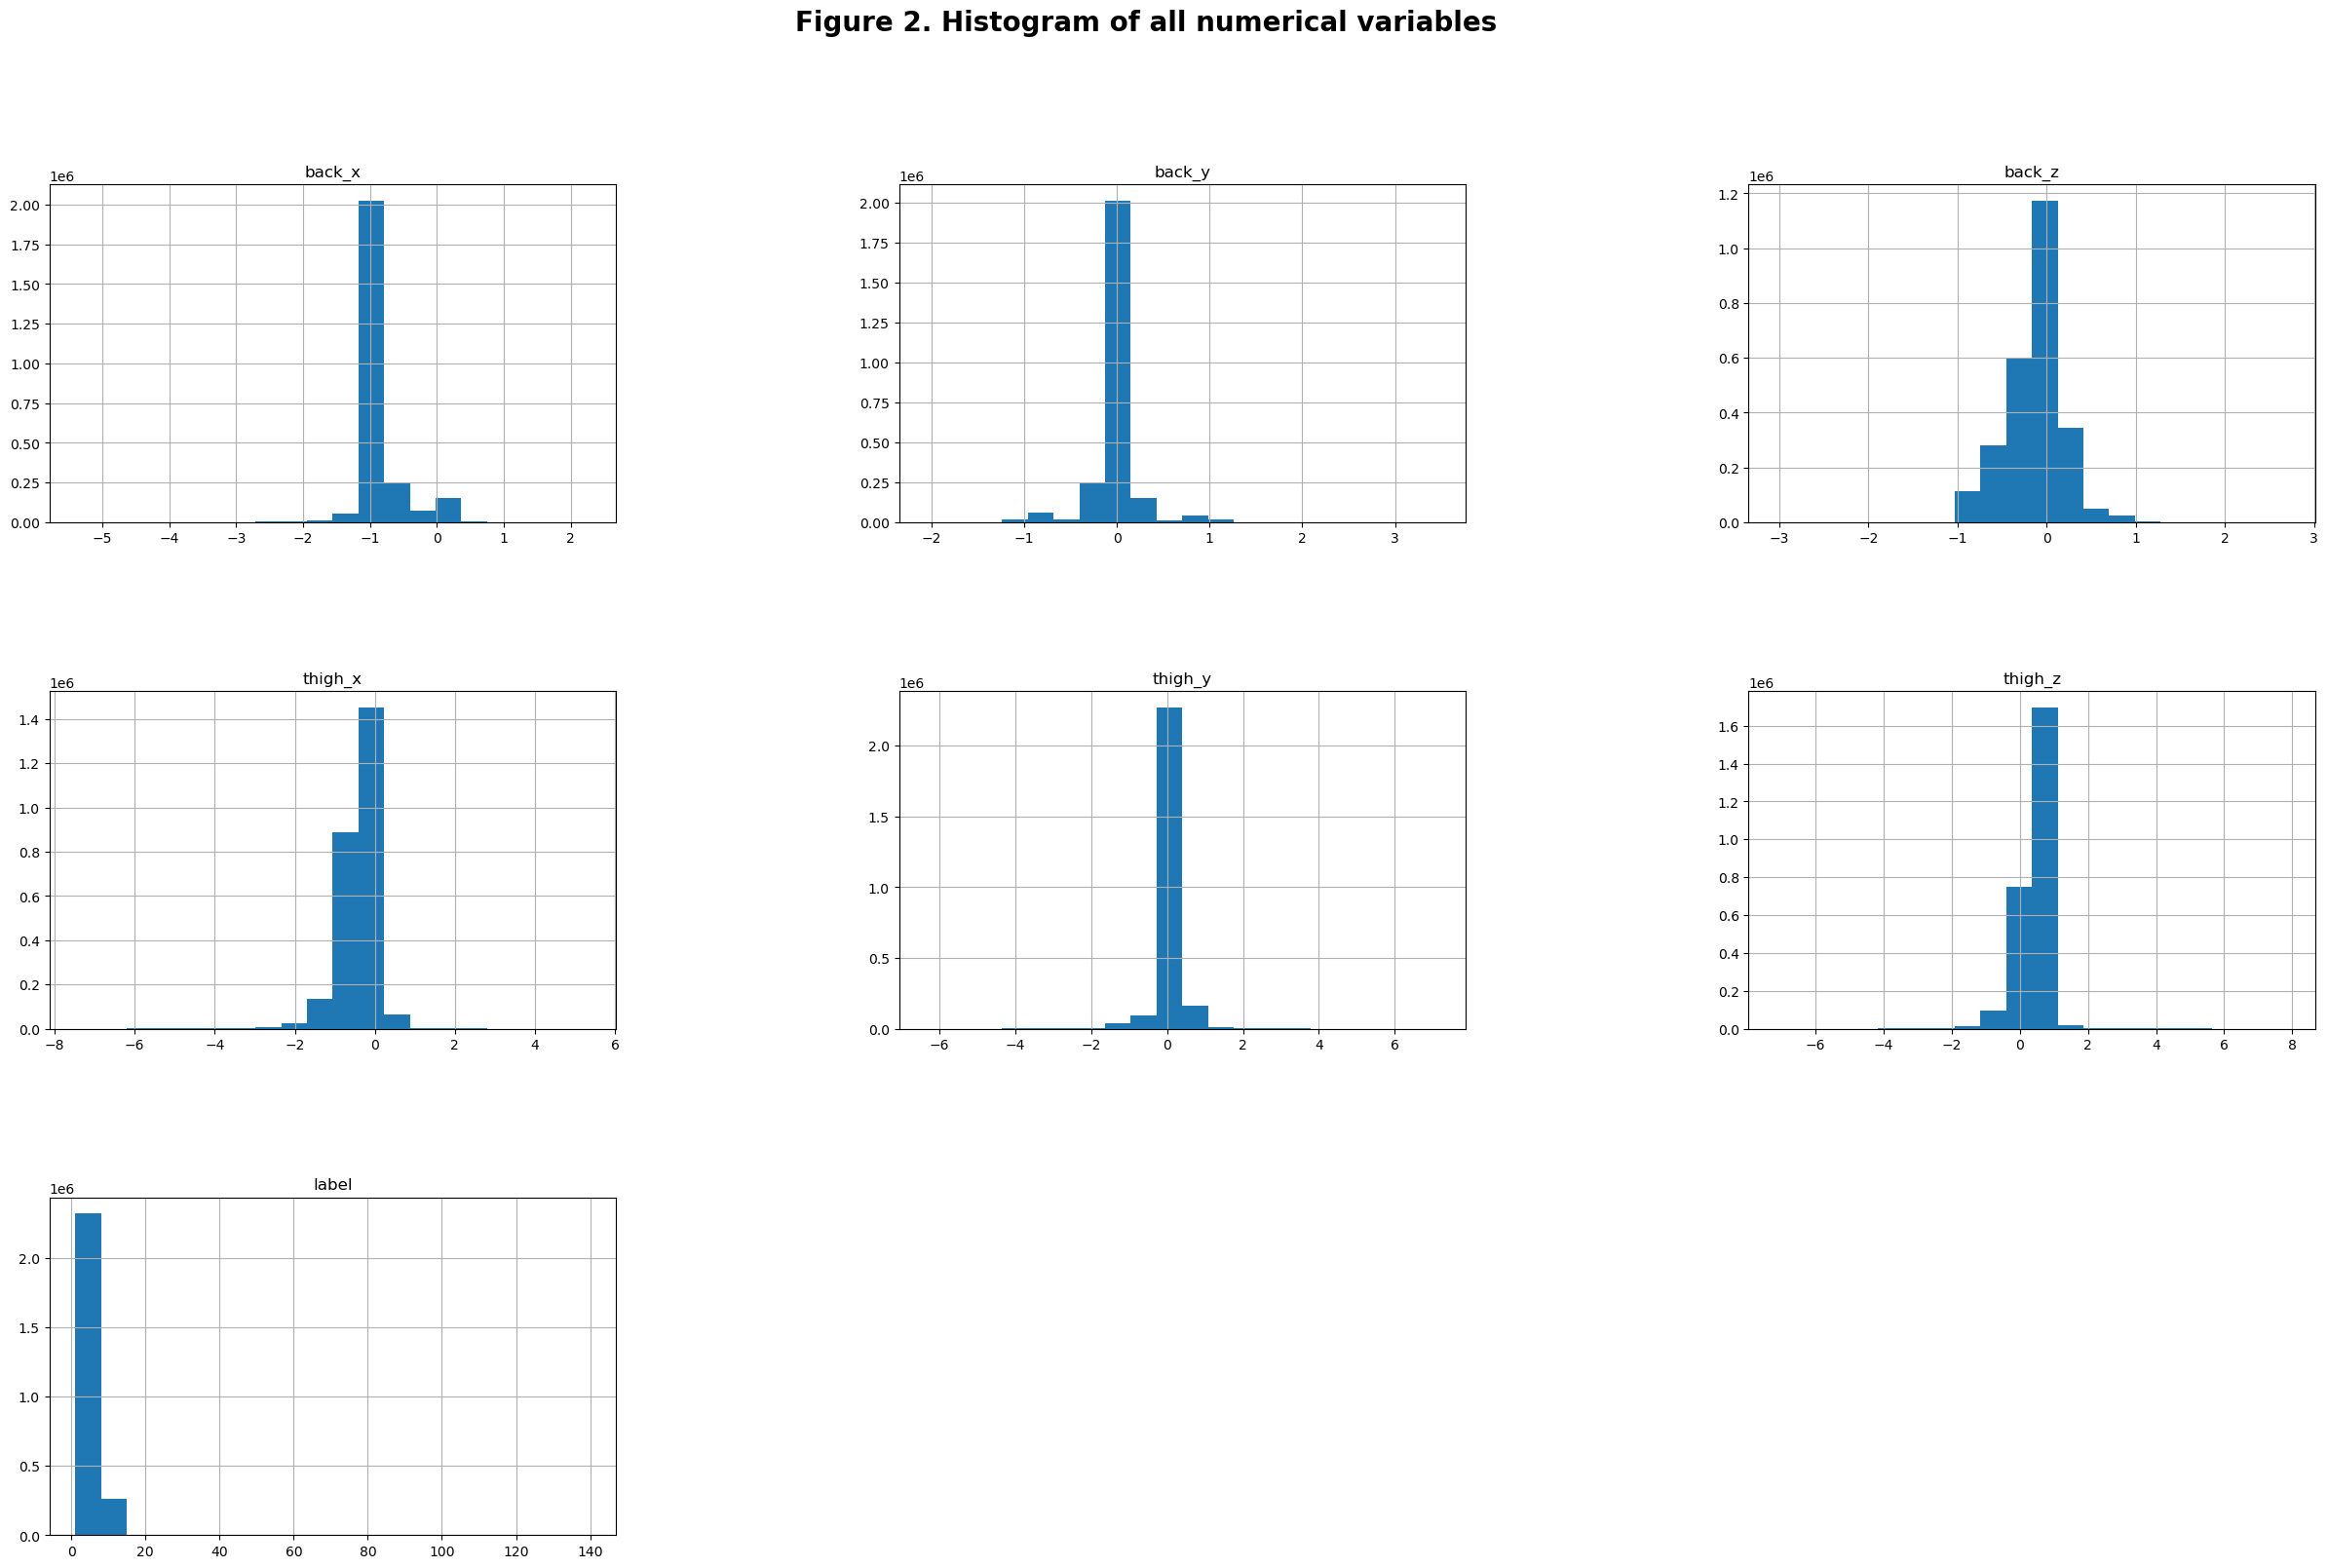

In [7]:
# Histogram of all numerical variables to observe the distribution of the data
df.hist(bins=20, figsize=(30,18))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle("Figure 2. Histogram of all numerical variables", fontsize=20, fontweight='bold')
plt.show()

In [8]:
sample = df.sample(n=2000, random_state=42)


In [9]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 440334 to 1337960
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   back_x   2000 non-null   float64
 1   back_y   2000 non-null   float64
 2   back_z   2000 non-null   float64
 3   thigh_x  2000 non-null   float64
 4   thigh_y  2000 non-null   float64
 5   thigh_z  2000 non-null   float64
 6   label    2000 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 125.0 KB


<Figure size 1000x800 with 0 Axes>

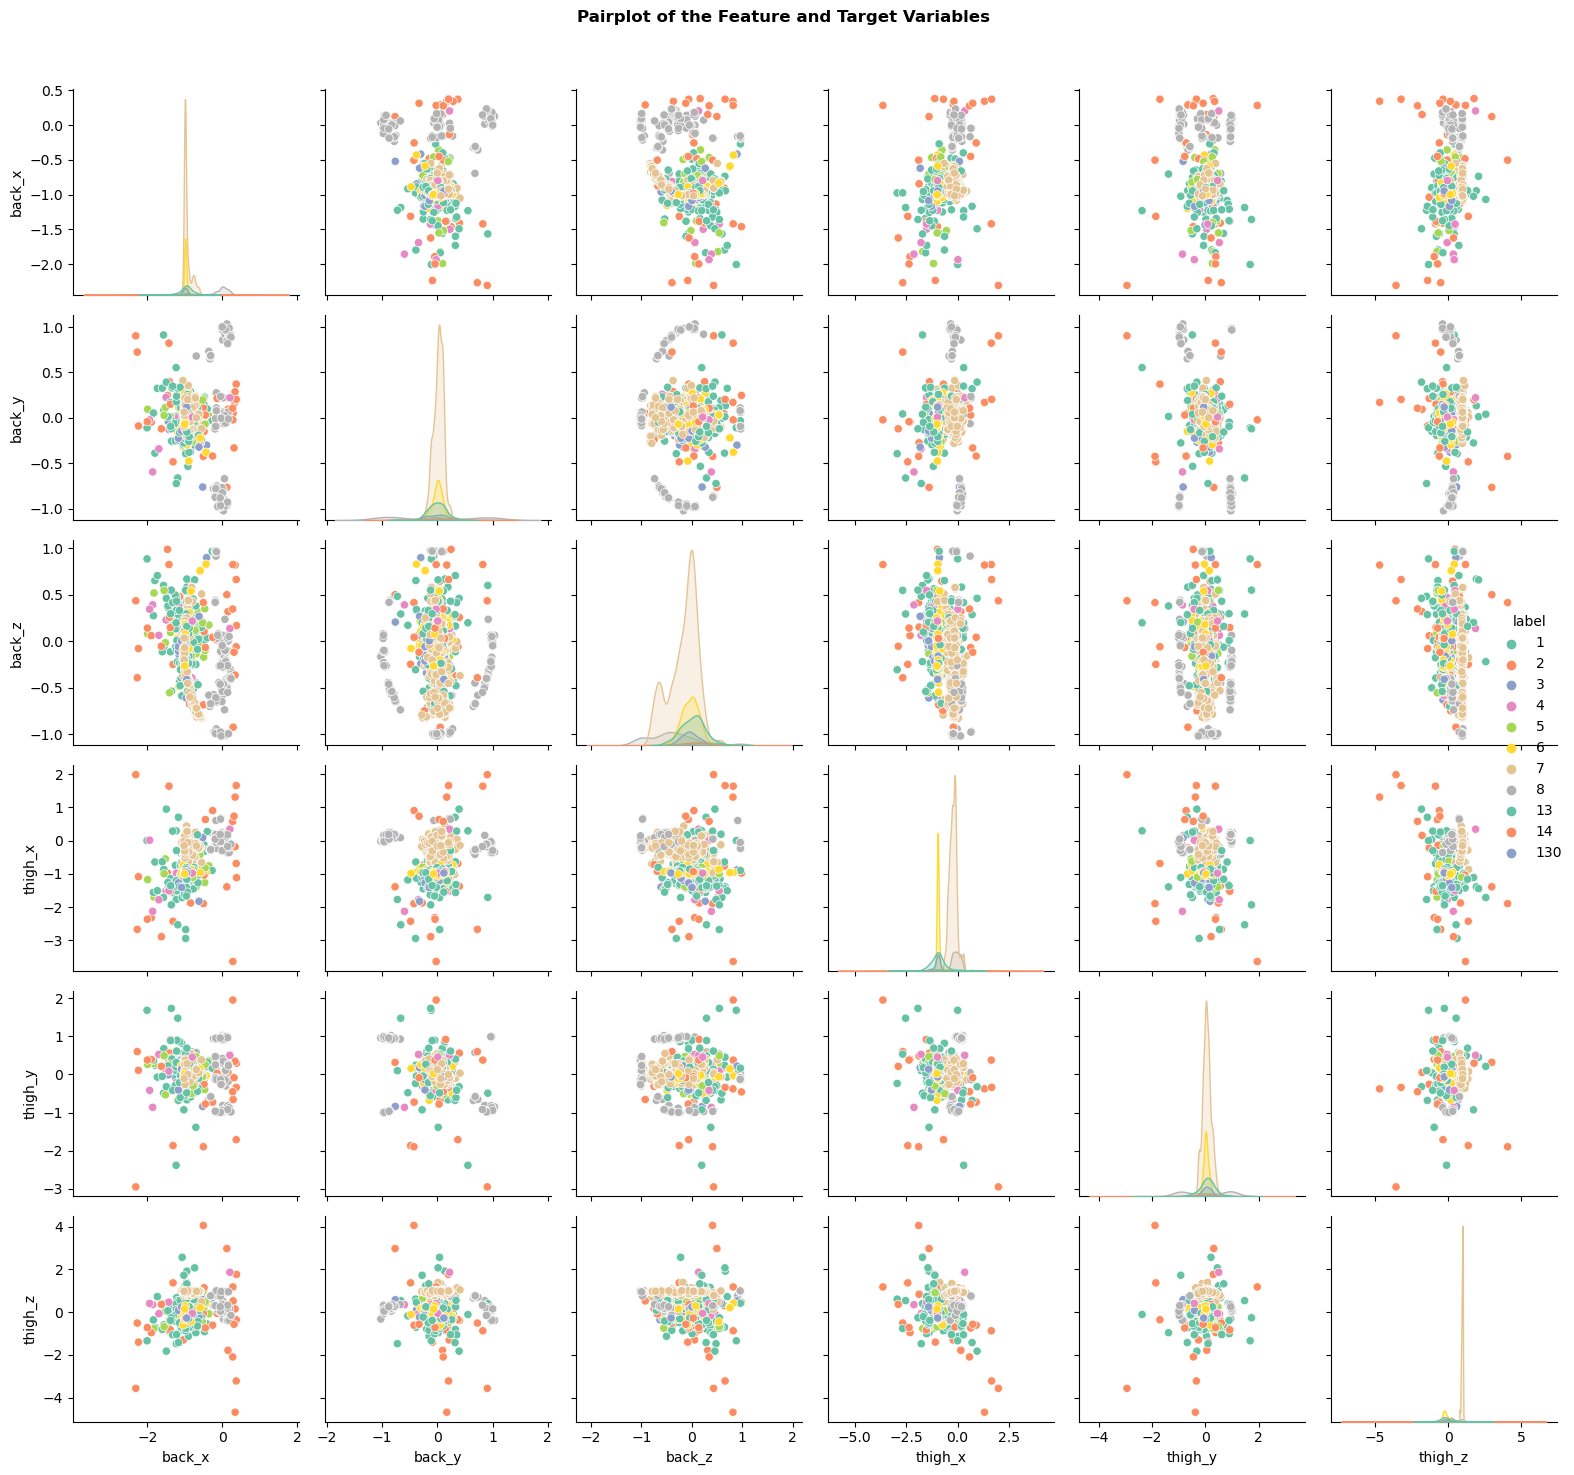

In [10]:

plt.figure(figsize=(10, 8))
sns.pairplot(sample, vars=["back_x", "back_y", "back_z", "thigh_x", "thigh_y", "thigh_z"], hue="label", palette="Set2")
plt.suptitle("Pairplot of the Feature and Target Variables", fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [11]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 440334 to 1337960
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   back_x   2000 non-null   float64
 1   back_y   2000 non-null   float64
 2   back_z   2000 non-null   float64
 3   thigh_x  2000 non-null   float64
 4   thigh_y  2000 non-null   float64
 5   thigh_z  2000 non-null   float64
 6   label    2000 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 125.0 KB


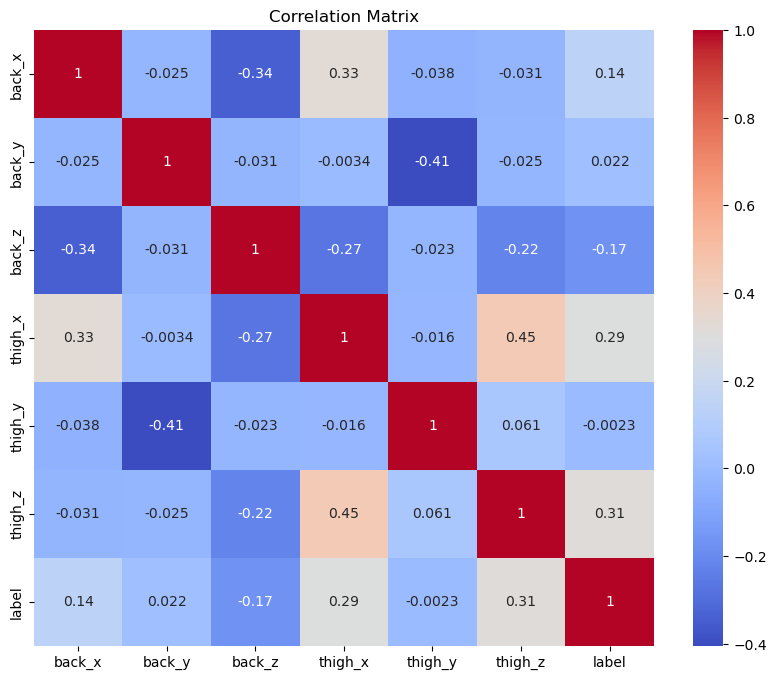

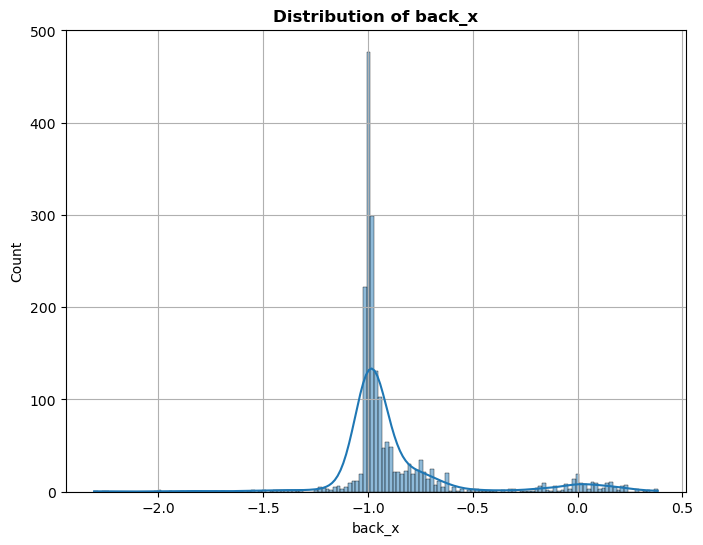

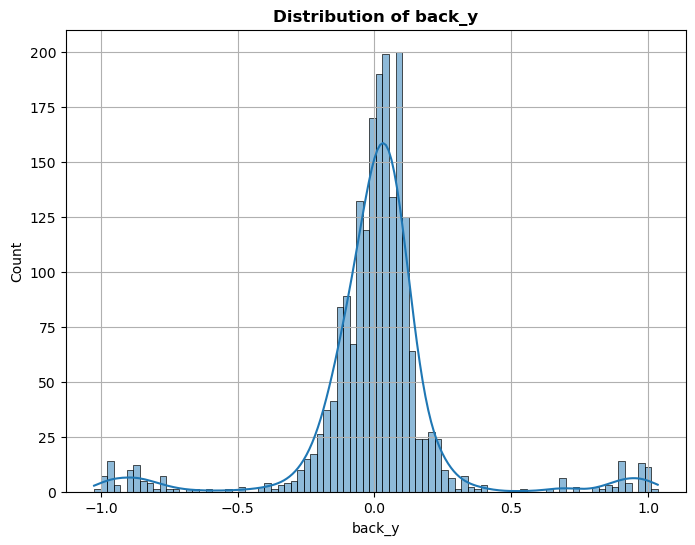

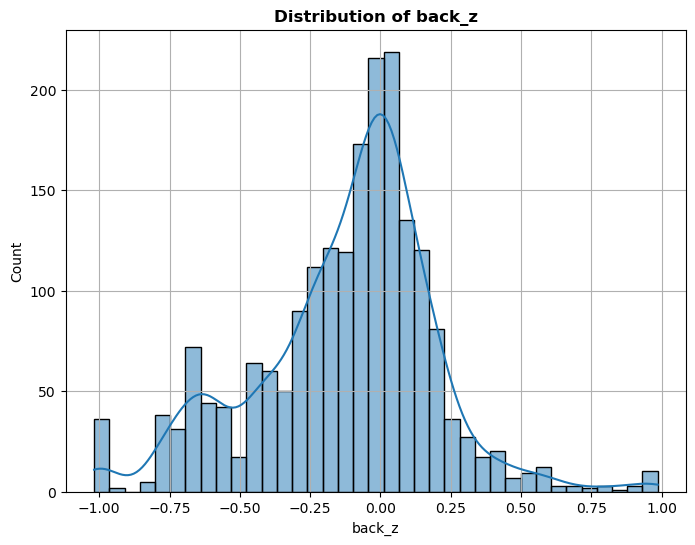

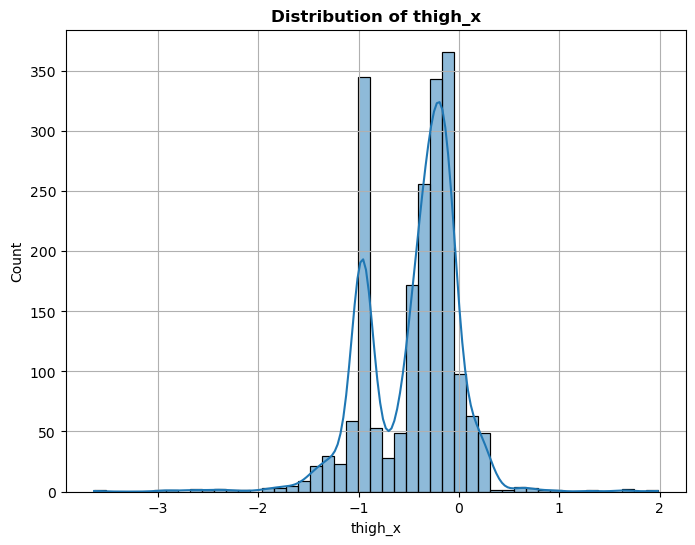

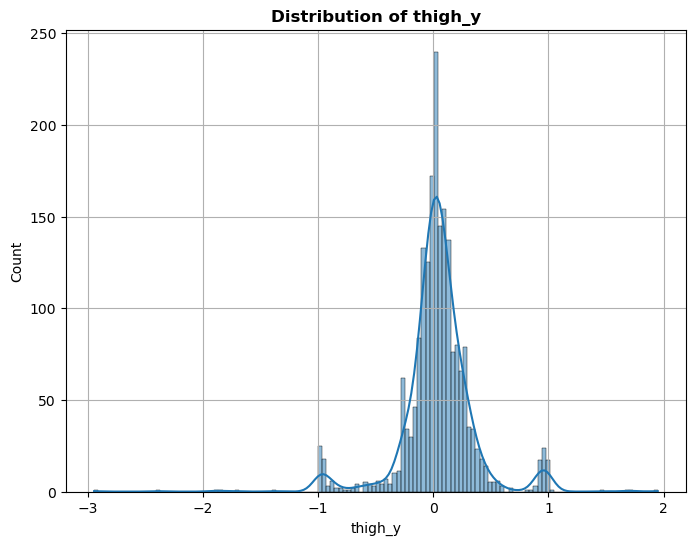

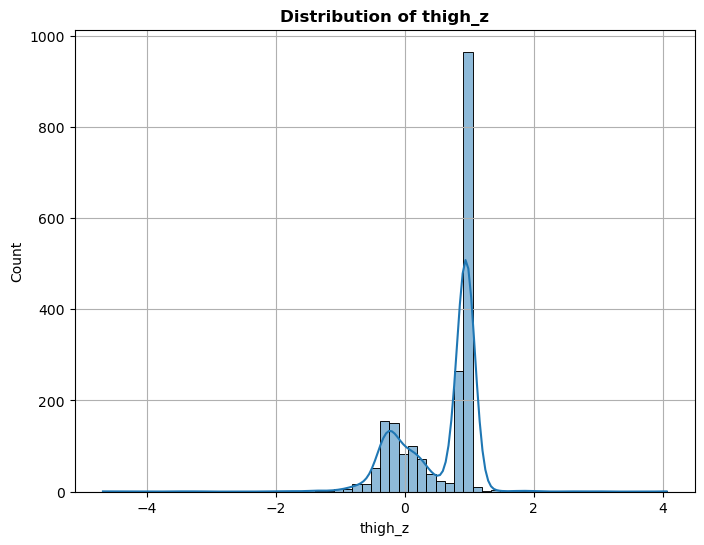

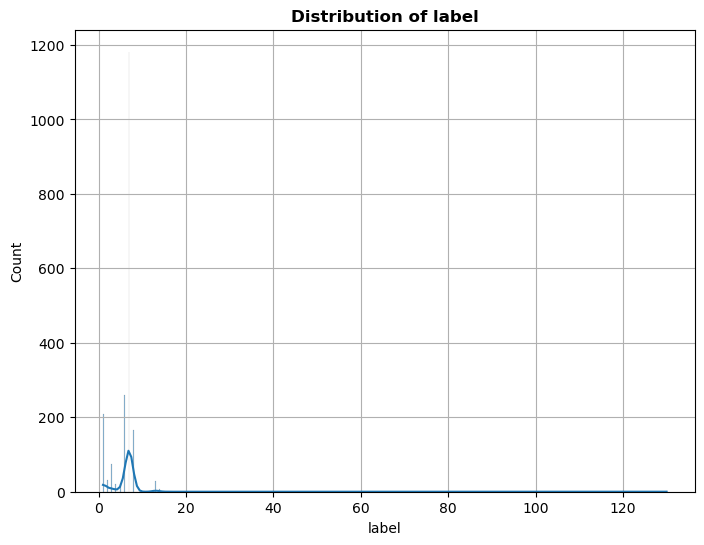

In [12]:

# Correlation Analysis
corr_matrix = sample.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Feature Analysis
for column in sample.columns:
    if sample[column].dtype == 'object':
        print(f"Category counts for {column}:")
        print(sample[column].value_counts())
    else:
        plt.figure(figsize=(8, 6))
        sns.histplot(sample[column], kde=True)
        plt.title(f'Distribution of {column}', fontweight='bold')
        plt.grid(True) 
        plt.show()

In [13]:
# Check for missing values
missing_vals = df.isnull().sum().sort_values(ascending=False)
missing_vals

back_x     0
back_y     0
back_z     0
thigh_x    0
thigh_y    0
thigh_z    0
label      0
dtype: int64

In [14]:
(df['label'].value_counts())

7      1517231
6       322101
1       268666
8       216104
3       117451
13       36784
2        32854
4        32384
5        28738
14        6635
130       1560
140        160
Name: label, dtype: int64

### Data Pre-Processing

In [15]:
if df.isnull().values.any():
    print("The DataFrame contains NaN values.")
else:
    print("The DataFrame does not contain NaN values.")

The DataFrame does not contain NaN values.


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580668 entries, 0 to 2580667
Data columns (total 7 columns):
 #   Column   Dtype  
---  ------   -----  
 0   back_x   float64
 1   back_y   float64
 2   back_z   float64
 3   thigh_x  float64
 4   thigh_y  float64
 5   thigh_z  float64
 6   label    int64  
dtypes: float64(6), int64(1)
memory usage: 137.8 MB


In [17]:
nan_rows = df[df.isnull().any(axis=1)]
nan_columns = df.columns[df.isnull().any()]

print("Rows with NaN values:")
print(nan_rows)

print("Columns with NaN values:")
print(nan_columns)

Rows with NaN values:
Empty DataFrame
Columns: [back_x, back_y, back_z, thigh_x, thigh_y, thigh_z, label]
Index: []
Columns with NaN values:
Index([], dtype='object')


In [18]:
# Create an imputer object
imputer = SimpleImputer(strategy='mean')

# Impute NaN values in the feature columns
df[['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']] = imputer.fit_transform(df[['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']])

In [19]:

# Separate features and target
X = df.drop('label', axis=1)
y = df['label']

x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [20]:
# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

In [21]:
print(np.isnan(x_train).sum())

0


### Random Forest

In [22]:
# Start time
start_time = datetime.datetime.now()
print(f"Start Time: {start_time}")

# Random Forest with multi-processing and progress bar
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

print("Training Random Forest model...")
with tqdm(total=1, desc="Training", unit="model") as pbar:
    rf_model.fit(x_train, y_train)
    pbar.update(1)

print("Making predictions on the validation set...")
with tqdm(total=len(x_val), desc="Validation", unit="sample") as pbar:
    rf_val_predictions = rf_model.predict(x_val)
    pbar.update(len(x_val))

# Calculate metrics
rf_val_accuracy = accuracy_score(y_val, rf_val_predictions)
rf_val_precision = precision_score(y_val, rf_val_predictions, average='weighted')
rf_val_recall = recall_score(y_val, rf_val_predictions, average='weighted')
rf_val_f1 = f1_score(y_val, rf_val_predictions, average='weighted')

print("Random Forest - Validation Metrics:")
print("Accuracy:", rf_val_accuracy)
print("Precision:", rf_val_precision)
print("Recall:", rf_val_recall)
print("F1 Score:", rf_val_f1)

rf_metrics = {
    'accuracy': rf_val_accuracy,
    'precision': rf_val_precision,
    'recall': rf_val_recall,
    'f1': rf_val_f1
}

# End and Duration Calculation
end_time = datetime.datetime.now()
duration = end_time - start_time
minutes, seconds = divmod(duration.total_seconds(), 60)
print(f"Time Spent: {int(minutes)} minutes, {int(seconds)} seconds")

Start Time: 2024-05-08 00:58:05.862015
Training Random Forest model...


Training: 100%|██████████| 1/1 [02:16<00:00, 136.57s/model]


Making predictions on the validation set...


Validation: 100%|██████████| 387100/387100 [00:01<00:00, 226007.88sample/s]


Random Forest - Validation Metrics:
Accuracy: 0.918284680960992
Precision: 0.915226506064783
Recall: 0.918284680960992
F1 Score: 0.914049350610216
Time Spent: 2 minutes, 18 seconds


### Decision Tree

In [23]:
# Start time
start_time = datetime.datetime.now()
print(f"Start Time: {start_time}")

# Decision Tree with multi-processing and progress bar
dt_model = DecisionTreeClassifier(random_state=42)

print("Training Decision Tree model...")
with tqdm(total=1, desc="Training", unit="model") as pbar:
    dt_model.fit(x_train, y_train)
    pbar.update(1)

print("Making predictions on the validation set...")
with tqdm(total=len(x_val), desc="Validation", unit="sample") as pbar:
    dt_val_predictions = dt_model.predict(x_val)
    pbar.update(len(x_val))

# Calculate metrics
dt_val_accuracy = accuracy_score(y_val, dt_val_predictions)
dt_val_precision = precision_score(y_val, dt_val_predictions, average='weighted')
dt_val_recall = recall_score(y_val, dt_val_predictions, average='weighted')
dt_val_f1 = f1_score(y_val, dt_val_predictions, average='weighted')

print("Decision Tree - Validation Metrics:")
print("Accuracy:", dt_val_accuracy)
print("Precision:", dt_val_precision)
print("Recall:", dt_val_recall)
print("F1 Score:", dt_val_f1)

# Collect the metrics into a dictionary
dt_metrics = {
    'accuracy': dt_val_accuracy,
    'precision': dt_val_precision,
    'recall': dt_val_recall,
    'f1': dt_val_f1
}

# End and Duration Calculation
end_time = datetime.datetime.now()
duration = end_time - start_time
minutes, seconds = divmod(duration.total_seconds(), 60)
print(f"Time Spent: {int(minutes)} minutes, {int(seconds)} seconds")

Start Time: 2024-05-08 01:00:24.408389
Training Decision Tree model...


Training: 100%|██████████| 1/1 [00:46<00:00, 46.75s/model]


Making predictions on the validation set...


Validation: 100%|██████████| 387100/387100 [00:00<00:00, 4581681.57sample/s]


Decision Tree - Validation Metrics:
Accuracy: 0.886509945750452
Precision: 0.8865558401175078
Recall: 0.886509945750452
F1 Score: 0.8865256143843762
Time Spent: 0 minutes, 47 seconds


### Logistic Regression

In [24]:
# Start time
start_time = datetime.datetime.now()
print(f"Start Time: {start_time}")

# Logistic Regression for multiclass classification
lr_model = LogisticRegression(random_state=42, multi_class='multinomial', solver='lbfgs')

print("Training Logistic Regression model...")
with tqdm(total=1, desc="Training", unit="model") as pbar:
    lr_model.fit(x_train, y_train)
    pbar.update(1)

print("Making predictions on the validation set...")
with tqdm(total=len(x_val), desc="Validation", unit="sample") as pbar:
    lr_val_predictions = lr_model.predict(x_val)
    pbar.update(len(x_val))

# Calculate metrics
lr_val_accuracy = accuracy_score(y_val, lr_val_predictions)
lr_val_precision = precision_score(y_val, lr_val_predictions, average='weighted')
lr_val_recall = recall_score(y_val, lr_val_predictions, average='weighted')
lr_val_f1 = f1_score(y_val, lr_val_predictions, average='weighted')

print("Logistic Regression - Validation Metrics:")
print("Accuracy:", lr_val_accuracy)
print("Precision:", lr_val_precision)
print("Recall:", lr_val_recall)
print("F1 Score:", lr_val_f1)

# Collect the metrics into a dictionary
lr_metrics = {
    'accuracy': lr_val_accuracy,
    'precision': lr_val_precision,
    'recall': lr_val_recall,
    'f1': lr_val_f1
}


# End and Duration Calculation
end_time = datetime.datetime.now()
duration = end_time - start_time
minutes, seconds = divmod(duration.total_seconds(), 60)
print(f"Time Spent: {int(minutes)} minutes, {int(seconds)} seconds")

Start Time: 2024-05-08 01:01:11.508215
Training Logistic Regression model...


Training:   0%|          | 0/1 [00:00<?, ?model/s]/mnt/data/skanda/mambaforge/envs/gpu/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Training: 100%|██████████| 1/1 [00:41<00:00, 41.59s/model]


Making predictions on the validation set...


Validation: 100%|██████████| 387100/387100 [00:00<00:00, 11833497.89sample/s]
/mnt/data/skanda/mambaforge/envs/gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression - Validation Metrics:
Accuracy: 0.8113071557737019
Precision: 0.766032941421781
Recall: 0.8113071557737019
F1 Score: 0.7739460145743179
Time Spent: 0 minutes, 41 seconds


### Multi Layer Perceptron

In [25]:
# Start time
start_time = datetime.datetime.now()
print(f"Start Time: {start_time}")

# Multi-layer Perceptron (MLP) for multiclass classification
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)

print("Training MLP model...")
with tqdm(total=1, desc="Training", unit="model") as pbar:
    mlp_model.fit(x_train, y_train)
    pbar.update(1)

print("Making predictions on the validation set...")
with tqdm(total=len(x_val), desc="Validation", unit="sample") as pbar:
    mlp_val_predictions = mlp_model.predict(x_val)
    pbar.update(len(x_val))

# Calculate metrics
mlp_val_accuracy = accuracy_score(y_val, mlp_val_predictions)
mlp_val_precision = precision_score(y_val, mlp_val_predictions, average='weighted')
mlp_val_recall = recall_score(y_val, mlp_val_predictions, average='weighted')
mlp_val_f1 = f1_score(y_val, mlp_val_predictions, average='weighted')

print("MLP - Validation Metrics:")
print("Accuracy:", mlp_val_accuracy)
print("Precision:", mlp_val_precision)
print("Recall:", mlp_val_recall)
print("F1 Score:", mlp_val_f1)



# Collect the metrics into a dictionary
mlp_metrics = {
    'accuracy': mlp_val_accuracy,
    'precision': mlp_val_precision,
    'recall': mlp_val_recall,
    'f1': mlp_val_f1
}


# End and Duration Calculation
end_time = datetime.datetime.now()
duration = end_time - start_time
minutes, seconds = divmod(duration.total_seconds(), 60)
print(f"Time Spent: {int(minutes)} minutes, {int(seconds)} seconds")

Start Time: 2024-05-08 01:01:53.393411
Training MLP model...


Training: 100%|██████████| 1/1 [03:47<00:00, 227.64s/model]


Making predictions on the validation set...


Validation: 100%|██████████| 387100/387100 [00:00<00:00, 959578.84sample/s]


MLP - Validation Metrics:
Accuracy: 0.8991216739860501
Precision: 0.8890102320414761
Recall: 0.8991216739860501
F1 Score: 0.8846814444614577
Time Spent: 3 minutes, 48 seconds


In [26]:
data = {
    'Random Forest': rf_metrics,
    'Decision Tree': dt_metrics,
    'Logistic Regression': lr_metrics,
    'MLP': mlp_metrics
}

df_ = pd.DataFrame(data).T  # Transpose to have models as rows and metrics as columns

print(df_)

                     accuracy  precision    recall        f1
Random Forest        0.918285   0.915227  0.918285  0.914049
Decision Tree        0.886510   0.886556  0.886510  0.886526
Logistic Regression  0.811307   0.766033  0.811307  0.773946
MLP                  0.899122   0.889010  0.899122  0.884681


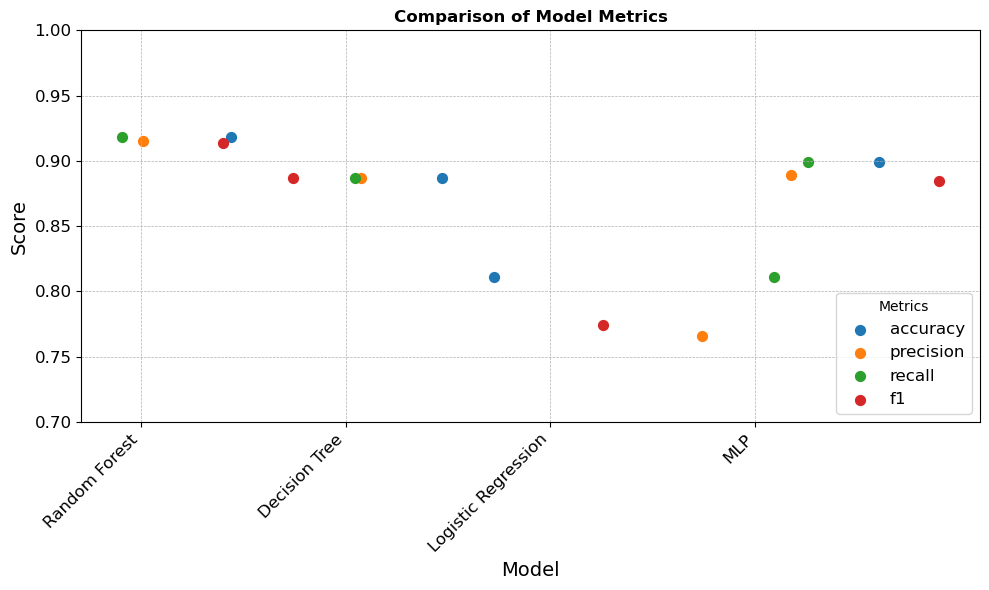

In [27]:
# Colors for each metric
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
models = df_.index
metrics = df_.columns

# Scatter plot with larger random x-axis offsets
x = np.arange(len(models))
for i, metric in enumerate(metrics):
    offsets = np.random.normal(0.2, 0.4, len(x))  # Larger random offsets
    ax.scatter(x + offsets, df_[metric], color=colors[i], label=metric, s=50)

ax.set_title('Comparison of Model Metrics', fontweight='bold')
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Score', fontsize=14)
ax.set_ylim(0.7, 1)  # Adjust if necessary based on your data range

# Set x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, fontsize=12, ha='right')

# Adjust y-axis ticks
plt.yticks(fontsize=12)

# Add grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Metrics', fontsize=12, loc='lower right')
plt.tight_layout()
plt.show()

In [28]:
# Metrics into one dictionary
all_models_metrics = {
    'Random_Forest': {'model': rf_model, 'metrics': rf_metrics},
    'Decision_Tree': {'model': dt_model, 'metrics': dt_metrics},
    'Logistic_Regression': {'model': lr_model, 'metrics': lr_metrics},
    'MLP': {'model': mlp_model, 'metrics': mlp_metrics}
}

# function to find the best model by F1 score
def find_best_model_by_f1(models_metrics):
    best_model_name = None
    best_model = None
    best_f1 = 0.0

    for model_name, data in models_metrics.items():
        model_f1 = data['metrics']['f1']
        if model_f1 > best_f1:
            best_model_name = model_name
            best_model = data['model']
            best_f1 = model_f1

    return best_model_name, best_model, best_f1

# Function to determine the best model based on F1 score
best_model_name, best_model, best_f1 = find_best_model_by_f1(all_models_metrics)
print(f"The best model based on F1 score is {best_model_name} with an F1 of {best_f1:.5f}")


The best model based on F1 score is Random_Forest with an F1 of 0.91405


In [29]:
test_predictions = best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')

print("Test Metrics on", best_model_name, "Algorithm:")
print(f"Accuracy: {test_accuracy:.5f}")
print(f"Precision: {test_precision:.5f}")
print(f"Recall: {test_recall:.5f}")
print(f"F1 Score: {test_f1:.5f}")

Test Metrics on Random_Forest Algorithm:
Accuracy: 0.91904
Precision: 0.91590
Recall: 0.91904
F1 Score: 0.91489


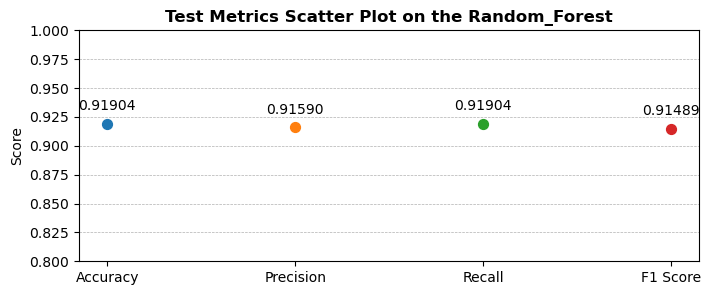

In [30]:
# Metrics and their corresponding values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [test_accuracy, test_precision, test_recall, test_f1]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
fig, ax = plt.subplots(figsize=(8, 3))

for i, metric in enumerate(metrics):
    ax.scatter(metric, values[i], color=colors[i], s=50)  # Increased size for better visibility

ax.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')
ax.set_ylabel('Score')
ax.set_title(f"Test Metrics Scatter Plot on the {best_model_name}", fontweight='bold')  # Correctly formatted title
ax.set_ylim(0.8, 1)
for i, txt in enumerate(values):
    ax.annotate(f'{txt:.5f}', (metrics[i], values[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.show()